[Reference](https://medium.com/@arylshamir98/simple-statistical-approach-to-spot-numerical-outliers-e64d74c56cf8)

In [1]:
#import the seaborn library.
import seaborn as sns

#loading the the tip dataset
tips = sns.load_dataset('tips')

#Display the head or first five rows of the tips dataset
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


# Histogram:

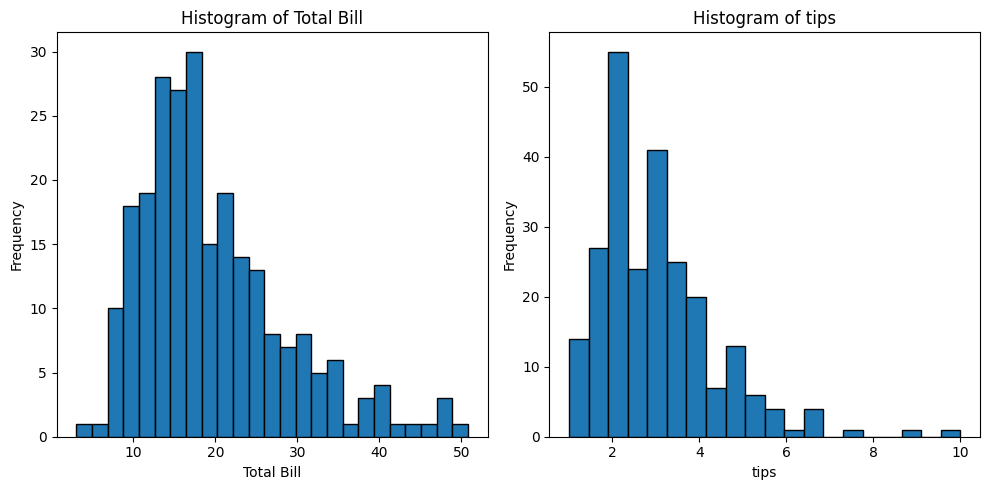

In [2]:
#import library
import matplotlib.pyplot as plt

#create a grid of 1x2 gird of subplot( 1rows, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(10,5))

#plot histogram for total bill.
ax[0].hist(tips['total_bill'], bins=25, edgecolor='black')
ax[0].set_title('Histogram of Total Bill')
ax[0].set_xlabel('Total Bill')
ax[0].set_ylabel('Frequency')

#plot histogram for tip
ax[1].hist(tips['tip'], bins=20, edgecolor='black')
ax[1].set_title('Histogram of tips')
ax[1].set_xlabel('tips')
ax[1].set_ylabel('Frequency')

# Adjust the spacing between subplots
fig.tight_layout()

# show plot
plt.show()

# Scatter Plot

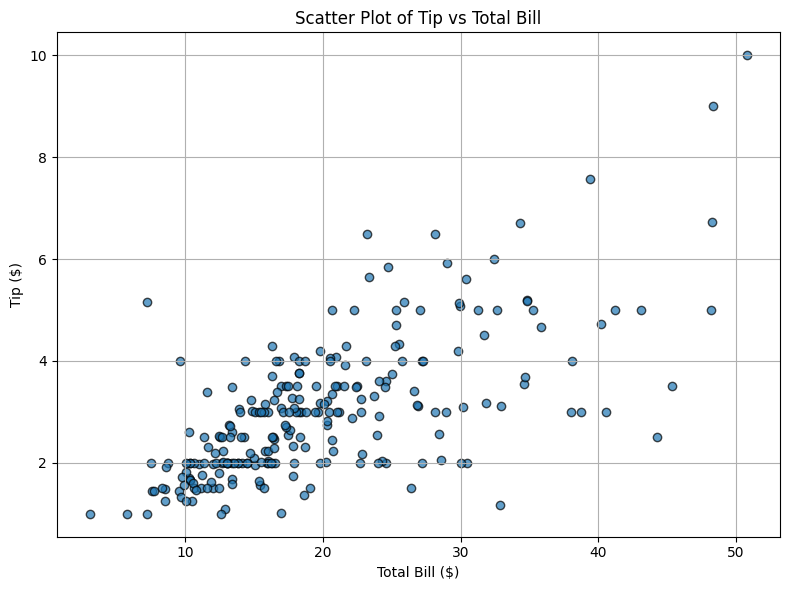

In [3]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(tips['total_bill'], tips['tip'], alpha=0.7, edgecolor='black')

# Add labels and title
plt.title('Scatter Plot of Tip vs Total Bill')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Inter Quartile Range (IQR):

In [4]:
import numpy as np
# Choose the 'tip' column
column = 'tip' # or you can use 'total_bill'.

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(tips[column], 25)
Q3 = np.percentile(tips[column], 75)

# Compute IQR
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = tips[(tips[column] < lower_bound) | (tips[column] > upper_bound)]

# Show results

print(f"Number of outliers in '{column}': {outliers.shape[0]}")
print("\nOutlier Rows:")
display(outliers)

Number of outliers in 'tip': 9

Outlier Rows:


,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3


In [5]:
from collections import Counter
import numpy as np
features = ["total_bill", "tip"] # Features you which to identify outliers

def IQR_method(df, n, features):
    """
    Detects rows in the DataFrame that are outliers in more than 'n' features using the IQR method.

    Parameters:
    - df: The input DataFrame.
    - n: The minimum number of features in which a row must be an outlier to be included.
    - features: List of column names to check for outliers.

    Returns:
    - A list of row indices that are outliers in more than 'n' features.
    """
    outlier_indices = []

    for column in features:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR

        # Find indices of outliers in the current column
        column_outliers = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
        outlier_indices.extend(column_outliers)

    # Count how many times each index appeared as an outlier
    outlier_counts = Counter(outlier_indices)

    # Keep only indices that appear as outliers in more than 'n' features
    multiple_outliers = [idx for idx, count in outlier_counts.items() if count > n]

    print(f"Total outlier records found across all features: {len(outlier_indices)}")
    return df.loc[multiple_outliers]

# Run the function
outlier_rows = IQR_method(tips, 1, features)

# Show detected outliers
print(f"\nDetected outliers based on features: {', '.join(features).title()}")
display(outlier_rows)

Total outlier records found across all features: 18

Detected outliers based on features: Total_Bill, Tip


,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4


# Z_Score.

In [6]:
feature = "tip"

# Calculate the Z-scores for the 'tip' column
mean_tip = np.mean(tips[feature])
std_tip = np.std(tips[feature])
z_scores = (tips[feature] - mean_tip) / std_tip

# Define a threshold for identifying outliers (commonly 3 or -3)
threshold = 3

# Find outlier indices, we get the absolute z score value (|z_scores|)
outlier_indices = tips[np.abs(z_scores) > threshold].index

# Extract and display the outlier rows
outliers = tips.loc[outlier_indices]

# Show result
print(f"Outliers in 'tip' column using Z-score (|z| > {threshold}):")
print(outliers)

Outliers in 'tip' column using Z-score (|z| > 3):
     total_bill    tip   sex smoker  day    time  size
23        39.42   7.58  Male     No  Sat  Dinner     4
170       50.81  10.00  Male    Yes  Sat  Dinner     3
212       48.33   9.00  Male     No  Sat  Dinner     4


# Median Absolute Deviation (MAD) and Modified Z-Score.

In [7]:
feature = "tip"

# Calculate the Z-scores for the 'tip' column
mean_tip = np.mean(tips[feature])
std_tip = np.std(tips[feature])
z_scores = (tips[feature] - mean_tip) / std_tip

# Define a threshold for identifying outliers (commonly 3 or -3)
threshold = 3

# Find outlier indices, we get the absolute z score value (|z_scores|)
outlier_indices = tips[np.abs(z_scores) > threshold].index

# Extract and display the outlier rows
outliers = tips.loc[outlier_indices]

# Show result
print(f"Outliers in 'tip' column using Z-score (|z| > {threshold}):")
print(outliers)

Outliers in 'tip' column using Z-score (|z| > 3):
     total_bill    tip   sex smoker  day    time  size
23        39.42   7.58  Male     No  Sat  Dinner     4
170       50.81  10.00  Male    Yes  Sat  Dinner     3
212       48.33   9.00  Male     No  Sat  Dinner     4
